In [4]:
import pymysql
import pandas as pd
conn=pymysql.connect(host='192.168.12.41',user='root',password='123456',database="ezp-crm1")
cursor = conn.cursor()
cursor.execute('''select * from (select crm_vip_info.Id,crm_vip_info.CopId,crm_vip_info.BrandId,crm_vip_info.GradeId,crm_vip_info.WxCodeGetTime,crm_vip_info.MobileBindTime,crm_vip_info.Sex,
       crm_vip_info.Birthday,crm_vip_info.IdCardNo,crm_vip_info.City,crm_vip_info.ServiceChannel,crm_vip_info.InviteDate, 
    crm_coupon_list.CouponNo,crm_coupon_list.CouponName,crm_coupon_list.CouponType,crm_coupon_list.CouponValue,crm_coupon_list.CouponPrice,
   crm_coupon_list.GenShopId,crm_coupon_list.ActOrigin,crm_coupon_list.ActId,crm_coupon_list.VipBindDate,crm_coupon_list.Status,crm_coupon_list.SellChannel,
   crm_coupon_list.SellDate,crm_coupon_list.SellMoney,crm_coupon_list.OutSysId
from crm_vip_info
LEFT JOIN crm_coupon_list
on crm_coupon_list.id=crm_vip_info.id and crm_coupon_list.Copid=crm_vip_info.copid and crm_coupon_list.BrandId=crm_vip_info.BrandId) as tt
where tt.BrandId=1''')
data=cursor.fetchall()
data

((693416,
  1,
  1,
  13862,
  datetime.datetime(1, 1, 1, 0, 0),
  datetime.datetime(2018, 1, 16, 12, 3, 7),
  '1',
  '2015-3-30',
  None,
  None,
  63134,
  datetime.datetime(2018, 1, 16, 12, 0, 32),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (4423287,
  1,
  1,
  1786,
  datetime.datetime(1, 1, 1, 0, 0),
  datetime.datetime(2018, 3, 2, 18, 20, 18),
  '0',
  '1985-08-08',
  None,
  '010901',
  42257,
  datetime.datetime(2018, 1, 10, 12, 1, 37),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (4423690,
  1,
  1,
  0,
  datetime.datetime(2018, 1, 31, 11, 26, 11),
  datetime.datetime(1, 1, 1, 0, 0),
  '0',
  '',
  None,
  None,
  35476,
  datetime.datetime(2018, 1, 12, 10, 11, 17),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (4423741,
  1,
  1,
  13862,
  datetime.datetime(2018, 1, 19

### 导入及整合数据

In [3]:
import pandas as pd
path1=open(r'C:\Users\86135\Desktop\新建文件夹\crm_vip_info.csv')
path2=open(r'C:\Users\86135\Desktop\新建文件夹\crm_coupon_list.csv')
data1=pd.read_csv(path1)
data2=pd.read_csv(path2)

del data1['分区']
del data2['分区']
del data1['oldbindnewid']
del data1['rowtype']
del data1['referee']
del data1['country']
del data1['copid']
data1=data1[data1['brandid']==65]   #筛选非该品牌数据
del data1['brandid']

del data2['rowtype']
del data2['couponprice']
del data2['brandid']
del data2['copid']

data1.columns=['会员编号','会员等级','老卡绑定时间','微信注册时间','服务渠道','服务导购','servicebindtime','入会时间','入会渠道','入会来源','邀请时间','邀请门店','邀请导购','最后更新时间','lastbuydate','mobileno','手机绑定时间','性别','生日','微信号码','wxunionid','省','城市','区','卡号']
del data1['微信号码']
del data1['wxunionid']

data2.columns=['id','所属券库','券包编号','券类型','券面额','有效期类型','有效起始日期','有效结束日期','有效结束日期Int','生成券日期','发放券用户','发放券渠道','活动来源','活动编号','会员编号','会员领取日期','服务渠道','券状态','核销渠道','核销时间','核销单编号','核销单号','订单金额','来源系统','最后更新时间']

d:\安装程序\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
d:\安装程序\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data=pd.merge(data1, data2, how='inner', on=['会员编号'])
del data['核销渠道']
del data['核销时间']
del data['核销单编号']
del data['核销单号']
del data['订单金额']
del data['来源系统']
del data['最后更新时间_y']
data['会员编号']=data['会员编号'].astype(int)
data['会员等级'] = data['会员等级'].map({0.0:0, 1197.0:1,1198.0:2,1199.0:3})
data['券类型']=data['券类型'].map({'CX':1,'DJ':2,'LP':3,'YQ':4,'ZK':5})
#data=data.replace('0001-01-01 00:00:00.0','1970-01-01 08:00:00.0')

In [5]:
data=data[['会员编号','会员等级','服务渠道_x','服务导购','手机绑定时间','微信注册时间','入会时间','性别','生日','省','券类型','券面额','生成券日期','有效结束日期','活动编号','券状态']]
data['服务导购']=data['服务导购'].astype(int)
data['性别']=data['性别'].astype(int)
data['会员编号']=data['会员编号'].astype(int)
data=data.fillna(0)   #替换所有NAN为0

In [6]:
data=data.replace('0001-01-01 00:00:00.0','1970-01-01 08:00:00.0')
data['手机绑定时间']=pd.to_datetime(data['手机绑定时间'], format= '%Y-%m-%d %H:%M:%S.%f')
data['微信注册时间']=pd.to_datetime(data['微信注册时间'], format= '%Y-%m-%d %H:%M:%S.%f')
data['入会时间']=pd.to_datetime(data['入会时间'], format= '%Y-%m-%d %H:%M:%S.%f')
data['生成券日期']=pd.to_datetime(data['生成券日期'], format= '%Y-%m-%d %H:%M:%S.%f')
data['有效结束日期']=pd.to_datetime(data['有效结束日期'], format= '%Y-%m-%d %H:%M:%S.%f')

data=data[['会员编号','会员等级','服务渠道_x','服务导购','性别','生日','省','券类型','券面额','活动编号','券状态']]
data=data[data['生日']!=0]

import datetime as dt
data['生日']=pd.to_datetime(data['生日'])
data['年龄']=dt.datetime.today().year-data['生日'].dt.year
data=data[['会员编号','会员等级','服务渠道_x','服务导购','性别','年龄','省','券类型','券面额','活动编号','券状态']]
data=data.reset_index()
del data['index']
data['券状态'] = data['券状态'].map({0:0,8:1})

data1 = data.copy(deep=True)

data['年龄']=pd.cut(data['年龄'],5)
data['服务渠道_x']=pd.cut(data['服务渠道_x'],5)
data['服务导购']=pd.cut(data['服务导购'],5)
data['省']=pd.cut(data['省'],3)
data['券面额']=pd.cut(data['券面额'],3)
data['活动编号']=pd.cut(data['活动编号'],5)
data

,会员编号,会员等级,服务渠道_x,服务导购,性别,年龄,省,券类型,券面额,活动编号,券状态
0,14043249,2,"(22743.566, 38910.8]","(-291.769, 58353.8]",0,"(31.2, 46.8]","(87.333, 131.0]",3,"(-0.26, 86.667]","(1148.8, 1723.2]",0
1,14043249,2,"(22743.566, 38910.8]","(-291.769, 58353.8]",0,"(31.2, 46.8]","(87.333, 131.0]",3,"(-0.26, 86.667]","(1148.8, 1723.2]",0
2,14043249,2,"(22743.566, 38910.8]","(-291.769, 58353.8]",0,"(31.2, 46.8]","(87.333, 131.0]",2,"(-0.26, 86.667]","(1148.8, 1723.2]",0
3,14043249,2,"(22743.566, 38910.8]","(-291.769, 58353.8]",0,"(31.2, 46.8]","(87.333, 131.0]",2,"(-0.26, 86.667]","(1148.8, 1723.2]",0
4,10715464,1,"(22743.566, 38910.8]","(-291.769, 58353.8]",2,"(15.6, 31.2]","(87.333, 131.0]",2,"(173.333, 260.0]","(-2.872, 574.4]",1
5,10715464,1,"(22743.566, 38910.8]","(-291.769, 58353.8]",2,"(15.6, 31.2]","(87.333, 131.0]",2,"(173.333, 260.0]","(-2.872, 574.4]",1
6,10715464,1,"(22743.566, 38910.8]","(-291.769, 58353.8]",2,"(15.6, 31.2]","(87.333, 131.0]",2,"(-0.26, 86.667]","(1148.8, 1723.2]",0
7,10715464,1,"(22743.566, 38910.8]","(-291.769, 58353.8]",2,"(15.6, 31.2]","(87.333, 131.0]",3,"(-0.26, 86.667]","(1148.8, 1723.2]",0
8,10715464,1,"(22743.566, 38910.8]","(-291.769, 58353.8]",2,"(15.6, 31.2]","(87.333, 131.0]",4,"(-0.26, 86.667]","(1148.8, 1723.2]",0
9,10715464,1,"(22743.566, 38910.8]","(-291.769, 58353.8]",2,"(15.6, 31.2]","(87.333, 131.0]",2,"(-0.26, 86.667]","(1148.8, 1723.2]",0


## 数据探索

In [ ]:
#https://github.com/ChandlerBBT/Titanic-Survival-Analysis-and-Mining/blob/master/project.ipynb

In [124]:
for x in data1: 
    print('Survival Correlation by:',x)
#    print(data1[[x,Target[0]]].groupby(x).mean())
    print(data1[[x,'券状态']].groupby(x).mean())
    print('----------------------------------------------------')

Survival Correlation by: 会员编号
          券状态
会员编号         
9608976   0.0
9613730   0.0
9614403   0.0
9615790   0.0
9619739   0.0
9620229   0.0
9620386   0.0
9623774   0.0
9624870   0.0
9627757   0.0
9628836   0.0
9629408   0.0
9629822   0.0
9638242   0.0
9641468   0.0
9642643   0.0
9652380   0.0
9660700   0.0
9661173   0.0
9702971   0.0
9735624   0.0
9737257   0.0
9744340   0.0
9745492   0.0
9754507   0.0
9755011   0.0
9758989   0.0
9759957   0.0
9762669   0.0
9765299   0.0
...       ...
95671001  0.0
95671381  0.0
95671461  0.0
95672512  0.0
95675267  0.0
95682746  0.0
95683889  0.0
95686647  0.0
95688428  0.0
95704811  0.0
95708713  0.0
95725419  0.0
95753790  0.0
95757452  0.0
95759433  0.0
95765830  0.0
95779944  0.0
95784887  0.0
95787523  0.0
95791064  0.0
95791245  0.0
95795019  0.0
95810067  0.0
95838778  0.0
95838830  0.0
95843479  0.0
95863298  0.0
95868141  0.0
95868242  0.0
95876512  0.0

[74618 rows x 1 columns]
----------------------------------------------------
Survival 

ValueError: Grouper for '券状态' not 1-dimensional

**各因素与券核销关系**

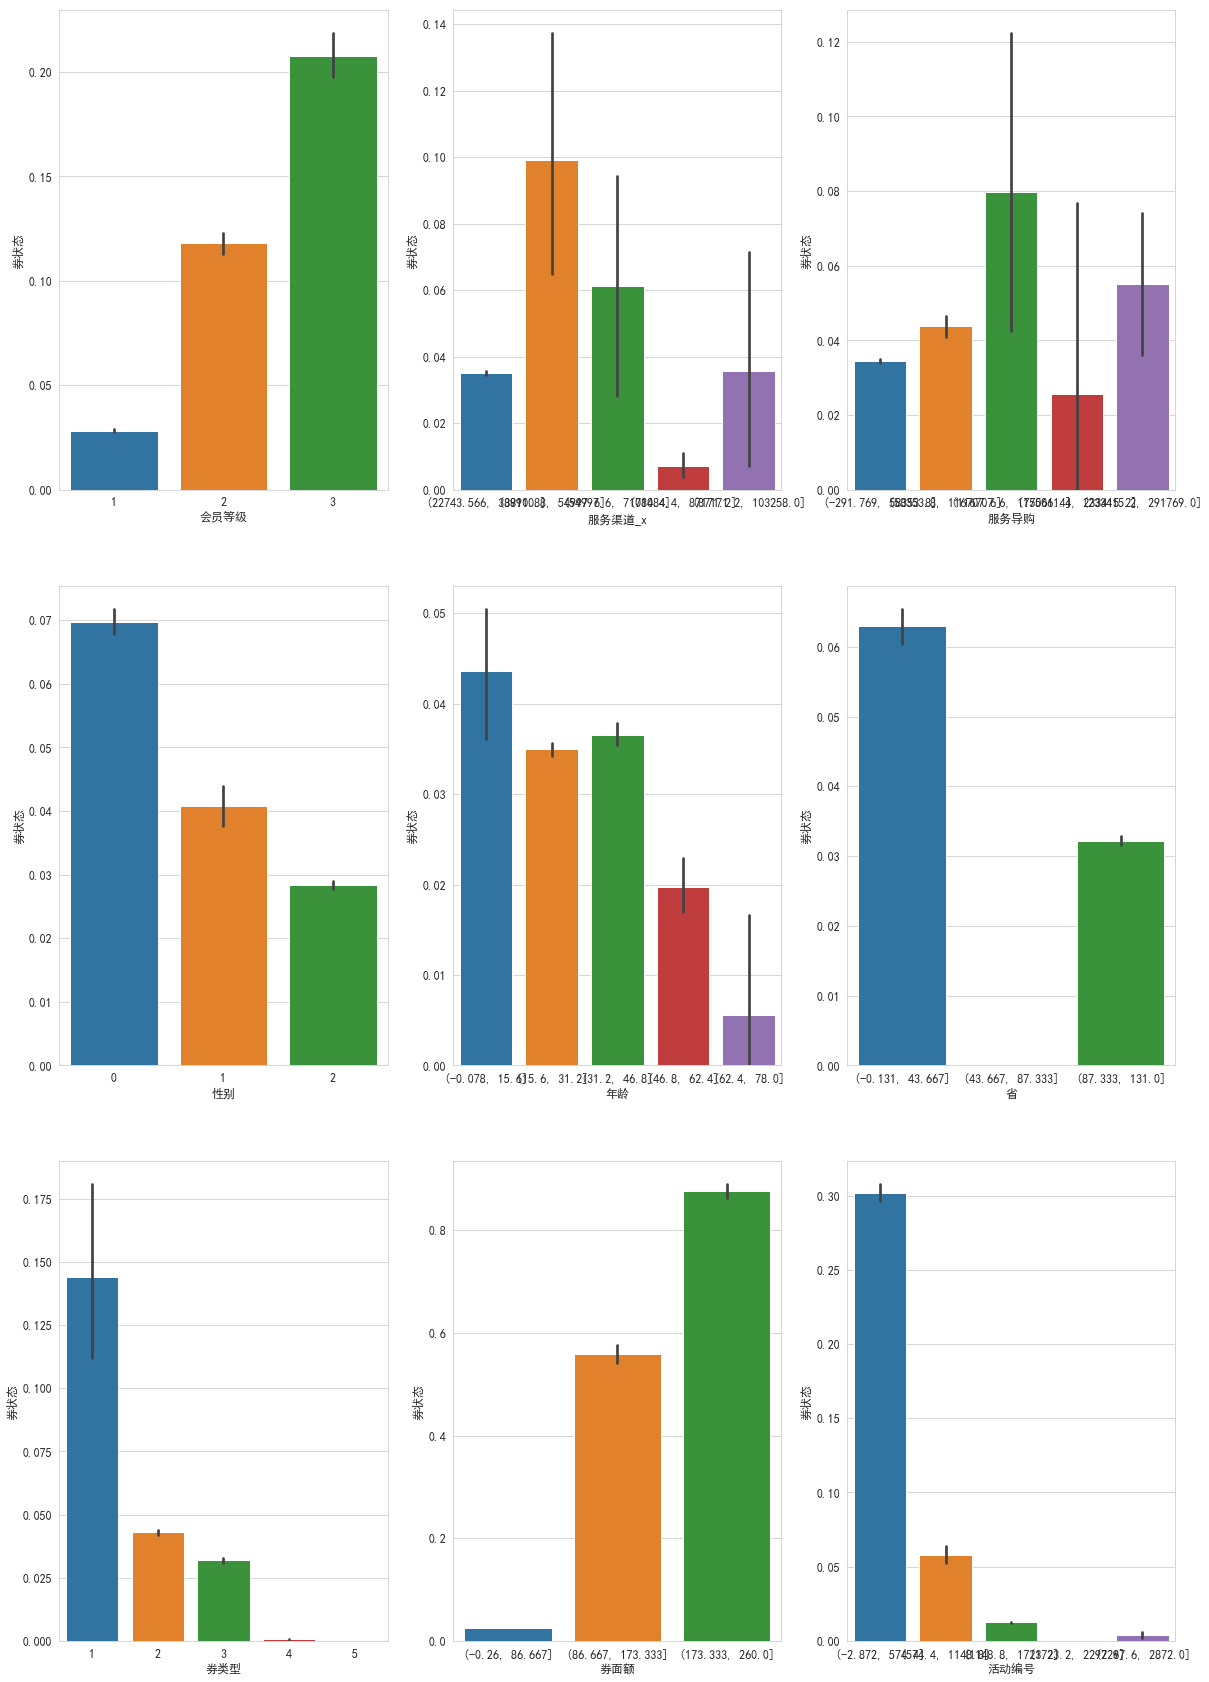

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

'''from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())'''
plt.rc("font",family="SimHei",size="12") 
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
#使用seaborn作图来展示各特征与幸存率的关系
#设置子图的个数以及画布的大小
fig,saxis = plt.subplots(3,3,figsize=(20,30))

#定制配色方案
#current_palette = sns.color_palette("pastel")

#定制画布的主题
#current_style = sns.set_style('whitegrid')

sns.barplot(x = '会员等级',y = '券状态',data = data,ax = saxis[0,0])  #第0行第0列，即左上角第一个图形，后面的依此类推
sns.barplot(x = '服务渠道_x',y = '券状态',data = data,ax = saxis[0,1])
sns.barplot(x = '服务导购',y = '券状态',data = data,ax = saxis[0,2])

sns.barplot(x = '性别',y = '券状态',data = data,ax = saxis[1,0])
sns.barplot(x = '年龄',y = '券状态',data = data,ax = saxis[1,1])
sns.barplot(x = '省',y = '券状态',data = data,ax = saxis[1,2])

sns.barplot(x = '券类型',y = '券状态',data = data,ax = saxis[2,0])
sns.barplot(x = '券面额',y = '券状态',data = data,ax = saxis[2,1])
sns.barplot(x = '活动编号',y = '券状态',data = data,ax = saxis[2,2])

**从图中看出核销券关联因素比较紧密的有会员等级 券面额 活动编号，一般关系有服务渠道 券类型  另外券核销和性别等关联较小**

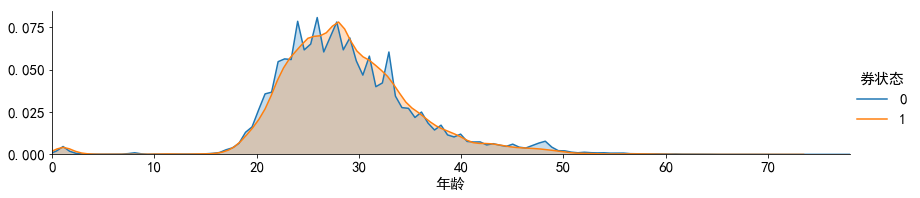

In [29]:
#针对顾客的核销情况，画出年龄分布
plt.rc("font",family="SimHei",size="15")
a = sns.FacetGrid(data1,hue = '券状态',aspect = 4)
a.map(sns.kdeplot,'年龄',shade = True)
a.set(xlim = (0,data1['年龄'].max()))
a.add_legend()

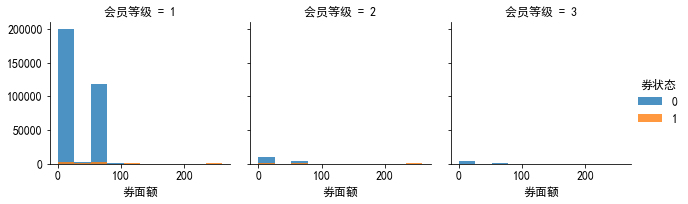

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",family="SimHei",size="12") 
h = sns.FacetGrid(data1,col = '会员等级',hue = '券状态')#row
h.map(plt.hist,'券面额',alpha = 0.8)
h.add_legend()

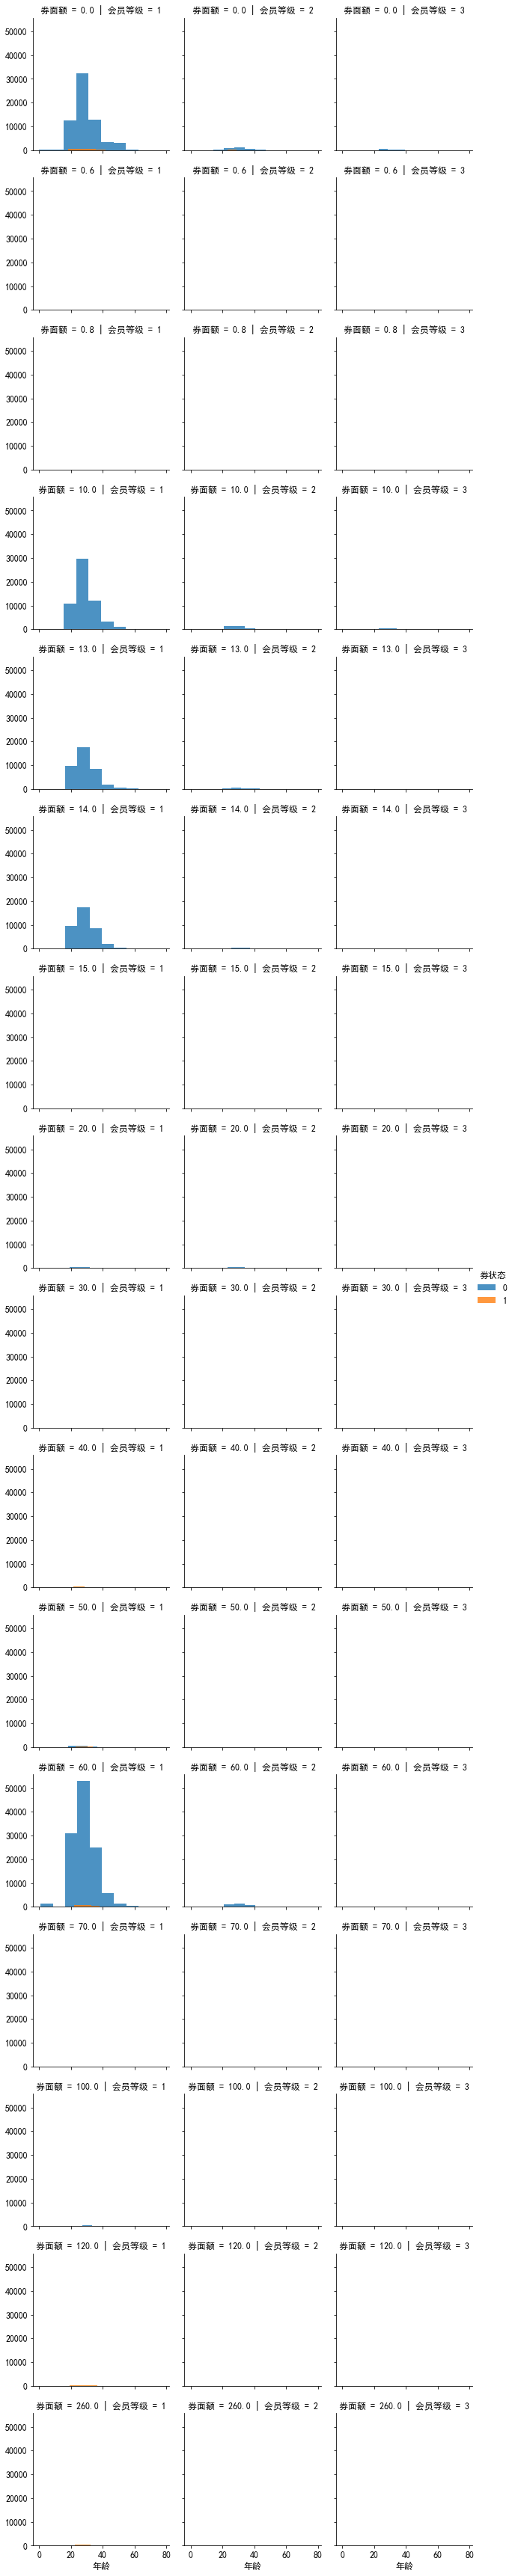

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",family="SimHei",size="12") 
h = sns.FacetGrid(data1,row = '券面额',col = '会员等级',hue = '券状态')
h.map(plt.hist,'年龄',alpha = 0.8)
h.add_legend()

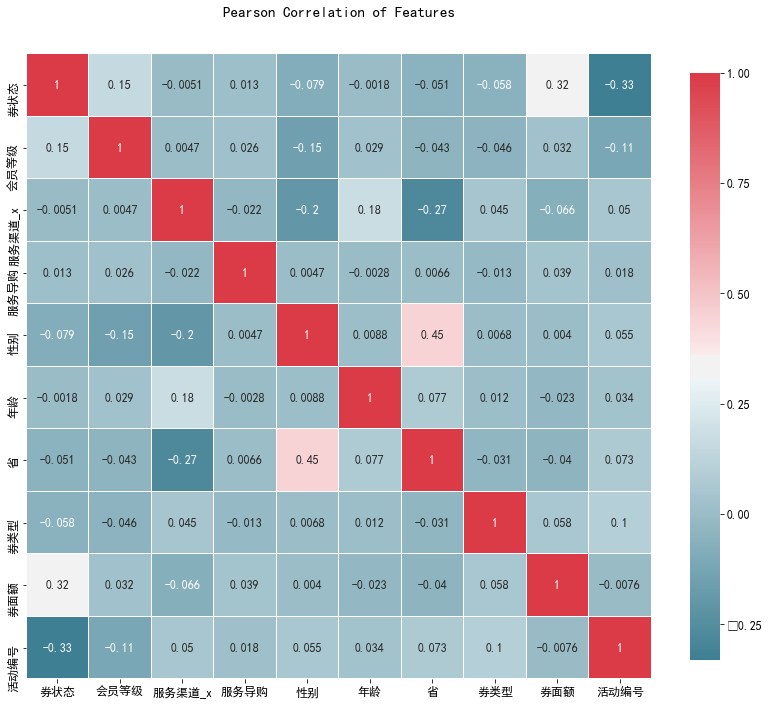

In [62]:
#相关性heatmap

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize = (14,12))
    colormap = sns.diverging_palette(220,10,as_cmap = True)    
    _ = sns.heatmap(df.corr(),cmap=colormap,square=True,cbar_kws={'shrink':0.9},ax=ax,annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title("Pearson Correlation of Features", y = 1.05, size = 15)    

correlation_heatmap(data1[['券状态','会员等级','服务渠道_x','服务导购','性别','年龄','省','券类型','券面额','活动编号']])

# 数据建模

In [68]:
from sklearn.cross_validation import train_test_split
X=data1[['会员等级','服务渠道_x','服务导购','性别','年龄','省','券类型','券面额','活动编号']]
y=data1['券状态']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 33)

X_train

,会员等级,服务渠道_x,服务导购,性别,年龄,省,券类型,券面额,活动编号
345940,1,22953,54526,0,19,0.0,3,0.0,0
63075,1,22958,243154,2,22,104.0,3,60.0,1359
142898,1,22922,0,2,30,106.0,3,60.0,1359
65649,1,22928,54540,2,21,105.0,2,14.0,1313
297082,3,22961,0,2,32,127.0,2,13.0,1313
74507,2,22884,54485,0,35,116.0,3,60.0,1359
188585,1,23159,0,2,33,107.0,2,60.0,1283
185626,1,26051,0,2,31,109.0,2,10.0,1226
26123,1,22953,54526,2,31,115.0,3,60.0,1359
328552,1,23501,0,1,21,0.0,2,20.0,194


In [102]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()#class_weight='balanced')
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X_train,y_train,cv=5)
print("在训练集上的精确率:{0:.2f}% +/-{1:.2f}%".format(scores.mean()*100,scores.std()*300))

在训练集上的精确率:97.60% +/-0.17%


In [105]:
scores = cross_val_score(clf,X_test,y_test,cv=5)
print("在测试集上的精确率:{0:.2f}% +/-{1:.2f}%".format(scores.mean()*100,scores.std()*300))

在测试集上的精确率:97.16% +/-0.28%


In [106]:
from sklearn.model_selection import cross_val_predict
train_predict = cross_val_predict(clf,X_train,y_train,cv=5)

from sklearn.metrics import confusion_matrix
confusion_matrix(train_predict,y_train)

array([[253075,   4068],
       [  2254,   5203]], dtype=int64)

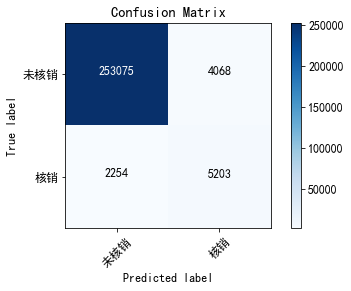

In [205]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm,classes,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = 'd';thresh = cm.max()/2.0
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#compute confusion matrix
cnf_matrix = confusion_matrix(train_predict,y_train)
np.set_printoptions(precision=2)
class_names = ['未核销','核销']
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names)

In [108]:
from sklearn.metrics import precision_score,recall_score,f1_score
p_s = precision_score(train_predict,y_train)
r_s = recall_score(train_predict,y_train)
f1 = f1_score(train_predict,y_train)
print('查准率为:{0:.2f}%,查全率为{1:.2f}%,F1_Score为:{2:.2f}%'.format(p_s*100,r_s*100,f1*100))

查准率为:56.12%,查全率为69.77%,F1_Score为:62.21%


**穷举所有子集  速度太慢了**

In [203]:
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,f1_score

from itertools import combinations
score=0
for i in range(1,len(X_train.columns)+1):
    num=list(combinations(X_train.columns, i))
    for j in num:
        select_predict=cross_val_predict(clf,X_train[list(j)],y_train,cv=5)
        f1 = f1_score(select_predict,y_train)
        if f1>score:
            score=f1
            print(j)
            print(f1)

d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


('服务渠道_x',)
0.00043135986196484415
('服务导购',)
0.017889468640187412


d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


('券面额',)
0.5310792853979034
('活动编号',)
0.588154553565301


d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


('服务渠道_x', '活动编号')
0.5963921784632332
('服务导购', '活动编号')
0.5970715835140998


d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


('券面额', '活动编号')
0.5978633063963841
('会员等级', '服务渠道_x', '活动编号')
0.6047104609810104
('会员等级', '券面额', '活动编号')
0.6082715307008753
('服务渠道_x', '券类型', '活动编号')
0.6361940298507462
('会员等级', '服务渠道_x', '券类型', '活动编号')
0.638013496691345
('会员等级', '服务渠道_x', '服务导购', '券类型', '活动编号')
0.6382533664531311
('会员等级', '服务渠道_x', '省', '券类型', '活动编号')
0.6390855361434045
('会员等级', '服务渠道_x', '省', '券面额', '活动编号')
0.6395183218956364


**前向搜索**

In [199]:
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,f1_score

columns=[]
select=0
score=0
for i in range(len(X_train.columns)):
    num=X_train.columns
    for j in num:
        if len(columns)==0:
            select_train=cross_val_predict(clf,X_train[[j]],y_train,cv=5)
            f1 = f1_score(select_train,y_train)
            if f1>=score:
                score=f1
                select=j
        else:
            if j not in columns:
                temp=columns
                temp.append(j)
                print(temp)
                select_train=cross_val_predict(clf,X_train[temp],y_train,cv=5)
                f1 = f1_score(select_train,y_train)
                if f1>score:
                    score=f1
                    select=j
                    print(score,j)
    if len(columns)==0 or columns[-1]!=select:
        columns.append(select)
columns

d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall

['活动编号', '会员等级']
['活动编号', '会员等级', '服务渠道_x']
0.603986309643648 服务渠道_x
['活动编号', '会员等级', '服务渠道_x', '服务导购']
0.6076152304609218 服务导购
['活动编号', '会员等级', '服务渠道_x', '服务导购', '性别']
['活动编号', '会员等级', '服务渠道_x', '服务导购', '性别', '年龄']
['活动编号', '会员等级', '服务渠道_x', '服务导购', '性别', '年龄', '省']
['活动编号', '会员等级', '服务渠道_x', '服务导购', '性别', '年龄', '省', '券类型']
0.6223314943631566 券类型
['活动编号', '会员等级', '服务渠道_x', '服务导购', '性别', '年龄', '省', '券类型', '券面额']
0.622352518846476 券面额


['活动编号', '会员等级', '服务渠道_x', '服务导购', '性别', '年龄', '省', '券类型', '券面额']

In [204]:
from sklearn.metrics import precision_score,recall_score,f1_score
select_train=X_train[['会员等级', '服务渠道_x', '省', '券面额', '活动编号']]
clf.fit(select_train,y_train)
select_predict = cross_val_predict(clf,select_train,y_train,cv=5)
p_s = precision_score(select_predict,y_train)
r_s = recall_score(select_predict,y_train)
f1 = f1_score(select_predict,y_train)
print('查准率为:{0:.2f}%,查全率为{1:.2f}%,F1_Score为:{2:.2f}%'.format(p_s*100,r_s*100,f1*100))

查准率为:53.20%,查全率为80.01%,F1_Score为:63.91%
